In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Aprendizaje supervisado parte 1 -- Clasificación

Para visualizar como funcionan los algoritmos de aprendizaje automático, es mejor considerar datos de una o dos dimensiones, esto es datasets con solo una o dos características. Aunque, en la práctica los datasets tienen muchas más características, es difícil representar datos de alta dimensionalidad en pantallas 2D.

Vamos a ilustrar ejemplos muy simples antes de comenzar con datasets del mundo real.


Primero, vamos a inspeccionar un problema de clasificación binaria con dos dimensiones. Utilizaremos los datos sintéticos que nos proporciona la función ``make_blobs``.

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\n5 primeros ejemplos:\n', X[:5, :])
print('\n5 primeras etiquetas:', y[:5])

X ~ n_samples x n_features: (100, 2)
y ~ n_samples: (100,)

5 primeros ejemplos:
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

5 primeras etiquetas: [1 1 0 0 1]


Como los datos son bidimensionales, podemos representar cada punto en un sistema de coordenadas (ejes x e y).

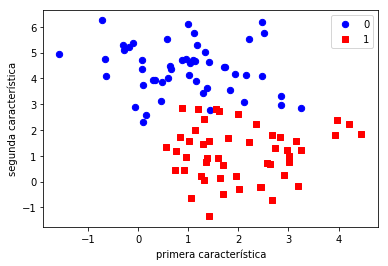

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel('primera característica')
plt.ylabel('segunda característica')
plt.legend(loc='upper right');

La clasificación es una tarea supervisada y, ya que estamos interesados en su rendimiento en datos no utilizados para entrenar, vamos a dividir los datos en dos partes:

1. un conjunto de entrenamiento que el algoritmo de aprendizaje utiliza para ajustar los parámetros del modelo
2. un conjunto de test para evaluar la capacidad de generalización del modelo

La función ``train_test_split`` del paquete ``model_selection`` hace justo esto por nosotros - la usaremos para generar una partición con un 75%//25% en entrenamiento y test, respectivamente.

<img src="figures/train_test_split_matrix.svg" width="100%">


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

### El API de un estimador de scikit-learn
<img src="figures/supervised_workflow.svg" width="100%">


Cualquier algoritmo de scikit-learn se maneja a través de una interfaz denominada ''Estimator'' (una de las ventajas de scikit-learn es que todos los modelos y algoritmos tienen una interfaz consistente). Por ejemplo, importamos la clase correspondiente al algoritmo de regresión logística:

In [5]:
from sklearn.linear_model import LogisticRegression

Ahora, instanciamos el estimador:

In [6]:
classifier = LogisticRegression()

In [7]:
X_train.shape

(75, 2)

In [8]:
y_train.shape

(75,)

Para construir el modelo a partir de nuestros datos, esto es, aprender a clasificar nuevos puntos, llamamos a la función ``fit`` pasándole los datos de entrenamiento, y las etiquetas correspondientes (la salida deseada para los datos de entrenamiento):

In [9]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Algunos métodos de los estimadores se devuelven a sí mismos por defecto. Esto es, después de ejecutar el código anterior, verás los parámetros por defecto de esta instancia particular de `LogisticRegression`. Otra forma de obtener los parámetros de inicialización de un estimador es usar `classifier.get_params()`, que devuelve un diccionario de parámetros.

Podemos aplicar el modelo a datos no utilizados anteriormente para predecir la respuesta estimada mediante el método ``predict``:

In [10]:
prediction = classifier.predict(X_test)

Podemos comparar el resultado con las etiquetas reales:

In [11]:
print(prediction)
print(y_test)

[1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0]
[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0]


Podemos evaluar nuestro modelo cuantitativamente utilizando la proporción de patrones correctos. A esto se le llama **accuracy**:

In [12]:
np.mean(prediction == y_test)

0.83999999999999997

Existe una función útil, ``score``, que incluyen todos los clasificadores de scikit-learn para obtener la medida de rendimiento a partir de los datos de test:
    

In [13]:
classifier.score(X_test, y_test)

0.83999999999999997

A veces es útil comparar el rendimiento en generalización (en el conjunto de test) con el rendimiento en entrenamiento:

In [14]:
classifier.score(X_train, y_train)

0.94666666666666666

LogisticRegression es un modelo lineal, lo que significa que creará una frontera de decisión que es lineal en el espacio de entrada. En 2D, esto quiere decir que generará una línea recta para separar los puntos azules de los rojos:

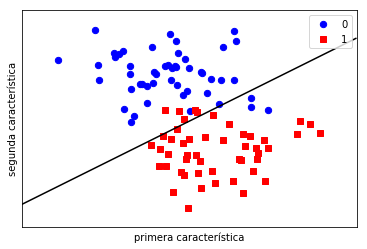

In [16]:
from figures import plot_2d_separator

plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("primera característica")
plt.ylabel("segunda característica")
plot_2d_separator(classifier, X)
plt.legend(loc='upper right');

**Parámetros estimados**: todos los parámetros estimados del modelo son atributos del objeto estimador cuyo nombre termina en guión bajo. Para la regresión logística, serían los coeficientes y la coordenada en el origen de la línea:

In [17]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 1.38092515 -1.49993172]]
[ 1.54995538]


Otro clasificador: K Nearest Neighbors
------------------------------------------------
Otro clasificador popular y fácil de entender es el *k Nearest Neighbors (kNN)*. Implementa una de las estrategias más simples de aprendizaje (de hecho, en realidad no aprende): dado un nuevo ejemplo desconocido, buscar en la base de datos de referencia (entrenamiento) aquellos ejemplos que tengan características más parecidas y asignarle la clase predominante.

La interfaz es exactamente la misma que para ``LogisticRegression``.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

Ahora vamos a modificar un parámetro de KNeighborsClassifier para que solo se examine el vecino más cercano:

In [33]:
knn = KNeighborsClassifier(n_neighbors=20)

Ajustamos el modelo con nuestros datos de entrenamiento.

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

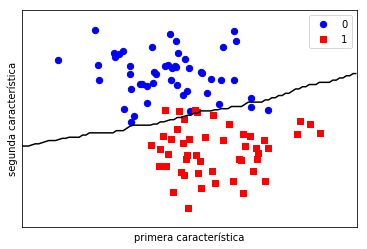

In [35]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("primera característica")
plt.ylabel("segunda característica")
plot_2d_separator(knn, X)
plt.legend(loc='upper right');

In [32]:
knn.score(X_test, y_test)

1.0

<div class="alert alert-success">
    <b>EJERCICIO</b>:
     <ul>
      <li>
      Aplicar KNeighborsClassifier al dataset ``iris``. Prueba con distintos valores para el parámetro ``n_neighbors`` y observa como cambian las puntuaciones de entrenamiento y test.
      </li>
    </ul>
</div>